# Project 3 - Regression

In the US, driving is an everyday, inescapable part of life. Without a car, anyone who doesn't live in or near the heart of a city struggles to exist and thrive within this country. As someone who grew up in Europe, this got me thinking about cars, being both someone who drives and interested in automobiles to begin with. 

Now, when I say interested, I was mostly curious about the environmental effects of different cars and how efficient these great, hulking beasts that make up the backbone of America are. Pushing past that, I got to wondering if there was a way to find out which parts of a car make it more or less efficient, and if it is possible to predict exactly how efficient a vehicle can be based on its different parts.

Introduction:

The Dataset I will be using is one that tracks the miles per gallon of different cars, from different years and companies. The dataset itself tracks 8 variables per entry, those being mpg, number of cylinders, engine displacement, how much horsepower the engine produces, vehicle weight, model year, country of origin (numerical value), and lastly, the name of each vehicle tracked.

First off, in terms of pre-processing, we'll be doing a bit of cutting down on the dataset so we have less variables to keep track of. Since we are trying to find out how the different parts of a car make it more or less efficient, the names of each vehicle don't really matter to us, and neither does the country of origin, allowing us to create a subset of just the numerical values we need.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Turn csv file into data frame
auto_mpg = pd.read_csv("auto-mpg.csv")
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [12]:
numerics = auto_mpg[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"]]
numerics.head()

# Replacing filler values with NaN, then filling the NaN values with medians.
numerics.replace('?', np.nan, inplace=True)

numerics = numerics.apply(pd.to_numeric)

cols = numerics.select_dtypes(include=[np.number]).columns

numerics[cols] = numerics[cols].fillna(numerics[cols].median())

C:\Users\valni\AppData\Local\Temp\ipykernel_17936\1811848719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerics.replace('?', np.nan, inplace=True)


A little bit more cleaning was done here, as after a closer look I found there were some entries in the dataset that had filler values set as a question mark (?), so I had to replace those with NaN values, then replace said NaN values with the median of the values of whatever column the question marks were. This way, I manage to not sway the data while achieving the results I want.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = numerics.drop('mpg', axis=1)
y = numerics["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1, max_depth=None)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

The next part I focused on was getting a regressor model up and running, starting with a simple Random Forest, which allows us to factor in all 5 variable we want to focus on and target miles per gallon as our predictor value, and then from there we can figure out how accurate these variables are at predicting mpg, and further on we can use those to find out which feature has the most relevance and weight when it comes to influencing mpg.

In [14]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R^2 : {r2:.3f}")

MAE : 1.65
RMSE : 2.24
R^2 : 0.907


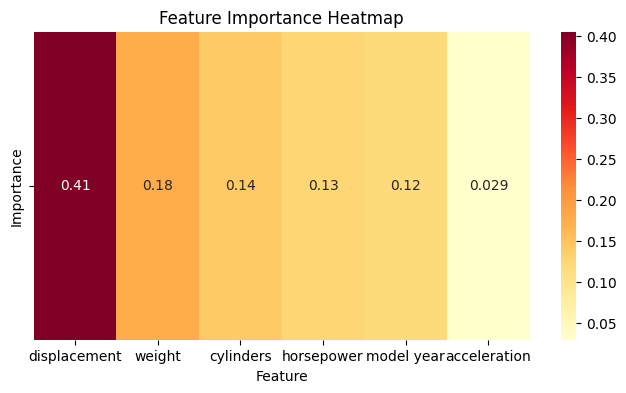

In [15]:
importances = rf.feature_importances_
features = X.columns

feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,4))
sns.heatmap(feat_imp_df.set_index('Feature').T, annot=True, cmap='YlOrRd')
plt.title("Feature Importance Heatmap")
plt.show()